# Resampling methods

# I. Imbalanced datasets

In many applications datasets might be **imbalanced**. Meaning, the label classes are not equally represented.

Those imbalanced datasets need a special treatment.

## I.1. Reminder: Imbalanced data and the accuracy paradox

Let's work on a real life example: credit card fraud detection. We will work on [this dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud).

This dataset is made of 33 features, anonymized for confidentiality (except the `Time` and `Amount` features).

This dataset is **higly imbalanced**:
- 28432 regular transactions
- 49 fraudulent transactions

In [1]:
import pandas as pd
df = pd.read_csv('fraud.csv')

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,...,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000
mean,95208.813455,0.012726,0.000476,-0.004435,0.012655,0.007934,-0.005479,0.003352,-0.005039,0.000943,...,0.001718,-0.002135,0.004524,-0.005816,-0.000319,0.003983,-0.000625,-0.000613,88.023627,0.001720
std,47462.019286,1.923268,1.629236,1.478621,1.430630,1.338637,1.318965,1.172529,1.156180,1.105621,...,0.706742,0.726664,0.603691,0.607972,0.521487,0.481063,0.399141,0.327958,231.415417,0.041443
min,17.000000,-36.510583,-47.429676,-25.188773,-5.071241,-31.356750,-20.054615,-28.215112,-41.484823,-9.481456,...,-20.262054,-8.593642,-19.935025,-2.822684,-5.785255,-1.658162,-8.878665,-8.424041,0.000000,0.000000
25%,54428.000000,-0.907909,-0.606632,-0.898424,-0.850314,-0.690137,-0.768533,-0.548264,-0.211192,-0.643115,...,-0.228652,-0.545012,-0.160655,-0.363423,-0.316361,-0.321025,-0.070258,-0.052049,5.940000,0.000000
50%,85310.000000,0.033025,0.069165,0.165844,-0.013895,-0.047706,-0.275393,0.044389,0.020769,-0.055640,...,-0.030396,0.004597,-0.010354,0.036670,0.017748,-0.050598,0.001450,0.011636,21.990000,0.000000
75%,139497.000000,1.317317,0.809194,1.010925,0.749306,0.616385,0.409577,0.573937,0.328586,0.599622,...,0.189373,0.523466,0.148269,0.438738,0.350675,0.241081,0.092322,0.079345,77.700000,0.000000
max,172769.000000,2.446505,15.536133,3.934537,11.844777,29.016124,20.379524,30.897666,15.374630,9.272376,...,22.614889,5.805795,20.803344,3.990646,7.519589,3.517346,10.507884,22.620072,7583.320000,1.000000


In [2]:
# Check the class balance
df['Class'].value_counts()

0    28432
1       49
Name: Class, dtype: int64

Any model that **always predicts regular transactions** would have an **accuracy greater than 99%**.

Then accuracy is **not the right metric**. What could we choose?

## I.2. Model training

Let's train a simple model on our data: a logistic regression.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
# Define X and y
X = df.drop(columns=['Class'])
y = df['Class']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Fit the model
lr = LogisticRegression()
lr.fit(X_train, y_train)
# Predict on test dataset
y_pred = lr.predict(X_test)

## I.3. Classification evaluation with imbalanced dataset

Let's compute the confusion matrix at first:

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

confusion_matrix(y_test, y_pred)

array([[5686,    1],
       [   7,    3]])

Our model provides the following results on the dataset:

| | Regular | Fraud | 
|:------:|:------:|:------:|
| Predicted Regular | 5686 | 7 |
| Predicted Fraud | 1 | 3 |

Let's compute the accuracy score:

In [6]:
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9985957521502545


The accuracy is hitting the roof, as expected. But is it really that good? Let's look at the other metrics:
- Precision
- Recall
- F1-score


In [7]:
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))

Precision: 0.75
Recall: 0.3
F1-score: 0.4285714285714285


Those metrics seem much more realistic about the performances.

Finally, have a look at the ROC AUC metric:

ROC AUC: 0.9296113944082997


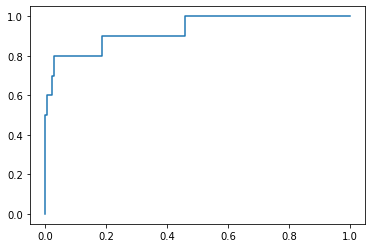

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
# Get the probas
y_pred_proba = lr.predict_proba(X_test)[:, 1]
# Compute the ROC AUC
print('ROC AUC:', roc_auc_score(y_test, y_pred_proba))
# Display the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.show()

> ROC AUC is also a better choice than the accuracy

## I.4. Limits with imbalanced datasets

At the end of the day, the problem remains:
- the model may not have enough underrepresented class data to understand it
- the model may have too much overrepresented class data to notice the other class



What could we do to help the model?

There are two main possibilities:
- Undersampling
- Oversampling

# II. Undersampling

## II.1. Principle

The first possible approach is to undersample the overrepresented class: 
- we keep **all the sample from underrepresented class**
- we keep only **a subsample of the overrepresented class**

As a reminder, this dataset has the following class balance:
- 28432 regular transactions
- 49 fraudulent transactions

A typical Random Undersampling would be to increase the balanced by **dropping regular samples**, to have a 1/10 ratio for example:
- 441 regular transactions
- 49 fraudulent transactions

We would then have $\frac{49}{490} = 10 %$ of fraudulent transactions.

> The drawback of this extreme method is that we **lose most of our data**

## II.2. Implementation with `imblearn`

This method can be applied using the **`imbalanced-learn`** library. If needed, you can install it with :
```bash
conda install -c conda-forge imbalanced-learn
```

Here, we will use the following class:

```python
class imblearn.under_sampling.RandomUnderSampler(sampling_strategy='auto', return_indices=False, random_state=None, replacement=False, ratio=None)
```

More details about this [here on the Imbalanced Learn website](https://imbalanced-learn.readthedocs.io/en/stable/under_sampling.html).

In [9]:
from imblearn.under_sampling import RandomUnderSampler
# Instantiate the object with a 10% strategy
rus = RandomUnderSampler(sampling_strategy=0.1)
# Undersample our train dataset
X_rus, y_rus = rus.fit_sample(X_train, y_train)
# Check the balance
y_rus.value_counts()

0    390
1     39
Name: Class, dtype: int64

We have now a 1/10 ratio between the classes. Let's check if this improves our model.

In [10]:
# Fit the model
lr = LogisticRegression()
lr.fit(X_rus, y_rus)
# Predict on test dataset
y_pred = lr.predict(X_test)
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))

Precision: 0.09195402298850575
Recall: 0.8
F1-score: 0.16494845360824742


The previous results were:
- Precision: 0.75
- Recall: 0.3
- F1-score: 0.4285714285714285

It did improve recall, but other metrics are not better.

## III. Oversampling

## III.1. Random oversampling

This is the exact opposite approach of random undersampling: instead of removing some overrepresented class samples, we would **duplicate underrepresented class samples** to rebalance the dataset.

> Though intuitive, this method is not much efficient: in our case would duplicate each fraud about 500 times to reach balance...

## III.2. SMOTE

Another, smarter way of oversampling is the so called *Synthetic Minority Oversampling TEchnique* (SMOTE). 

instead of duplicates, we would **create new samples** using a **k-NN method** on original data. Let's detail the method.

Based on the k nearest neighboors of the fraudulent transactions, 

The first step is to pick randomly a fraudulent sample $x_i$.

Then, thanks to k-NN, pick randomly $x_{zi}$, one of the fraudulent k nearest neighboors of $x_i$.

You end up having two, close, fradulent transactions. And you will compute a new, synthetic, fraudulent transaction $x_{new}$:
$$
x_{new} = x_i + \lambda \times (x_{zi} - x_i)
$$

Where $\lambda$ is a random value between 0 and 1

A visual representation (from the [imblearn documentation](https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html#mathematical-formulation)) is the following:

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1S7iiSzQxlajEPPRX_rwgf-TKeeT4uGmt">
</p>

## III.3. Implementation with `imblearn`

SMOTE can also be computed using the `imbalanced-learn` library, with the following signature:

```python
class imblearn.over_sampling.SMOTE(sampling_strategy='auto', random_state=None, k_neighbors=5, m_neighbors='deprecated', out_step='deprecated', kind='deprecated', svm_estimator='deprecated', n_jobs=1, ratio=None)
```

With `k_neighbors` the hyperparameter of the number of neighbors in the k-NN.

More [on the Imbalanced Learn website](https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html#a-practical-guide).

Let's apply the method to our data.

In [11]:
from imblearn.over_sampling import SMOTE
# Instantiate the object with a 10% strategy
smote = SMOTE(sampling_strategy=0.1)
# SMOTE the train dataset
X_smote, y_smote = smote.fit_sample(X_train, y_train)
# Check the balance
y_smote.value_counts()

0    22745
1     2274
Name: Class, dtype: int64

This indeed increased the number of fradulent transactions. Let's fit and evaluate a model.

In [12]:
# Fit the model
lr = LogisticRegression()
lr.fit(X_smote, y_smote)
# Predict on test dataset
y_pred = lr.predict(X_test)
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))

Precision: 0.24242424242424243
Recall: 0.8
F1-score: 0.372093023255814


The previous results were:
- Precision: 0.75
- Recall: 0.3
- F1-score: 0.4285714285714285

It did improve recall and slightly the F1-score, but precision is still lower.

> For a robust evaluation and comparison, hyperparameter optimization should be performed